### Agora vamos calcular a taxa de retornos dos indices de ações.
#### Vamos usar outras açõe para calcular estes índices. Desta vez usaremos: GSPC, IXIC, GDAXI e FTSE. Ou seja, açõe do S&P500, da Nasdaq, do Indice Alemão DAX e da Nasdaq de Londres.
#### Lembrando que o acento cincunflexo é usado antes de cada Sigla, indicando ser indice de ações. 
#### Vamos extrair valores dos ultimos 29 anos, logo a série vai começar em 1995.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

tickers = ['^GSPC','^IXIC','^GDAXI','^FTSE']
ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = yf.download(t,start = '1995-01-01')['Close'] #Lembrete, apenas o preço de fechamento. 

print(ind_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                 ^GSPC       ^IXIC       ^GDAXI        ^FTSE
Date                                                        
1995-01-03  459.109985  743.580017  2068.919922  3065.699951
1995-01-04  460.709991  745.840027  2072.899902  3051.600098
1995-01-05  460.339996  745.659973  2051.459961  3032.300049
1995-01-06  460.679993  749.690002  2058.199951  3065.000000
1995-01-09  460.829987  752.090027  2053.409912  3055.800049


Verificar as primeiras linhas e as ultimas linhas do data frame.

In [2]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1995-01-03,459.109985,743.580017,2068.919922,3065.699951
1995-01-04,460.709991,745.840027,2072.899902,3051.600098
1995-01-05,460.339996,745.659973,2051.459961,3032.300049
1995-01-06,460.679993,749.690002,2058.199951,3065.000000
1995-01-09,460.829987,752.090027,2053.409912,3055.800049


In [3]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2024-12-24,6040.040039,20031.130859,NaN,8137.000000
2024-12-26,6037.589844,20020.359375,NaN,NaN
2024-12-27,5970.839844,19722.029297,19984.320312,8149.799805
2024-12-30,5906.939941,19486.789062,19909.140625,8121.000000
2024-12-31,5881.629883,19310.789062,NaN,8173.000000


Mais uma vez, o indice será normalizado para a base 100.

A Nasdaq é composta principalemnte por empresas de teconologia.

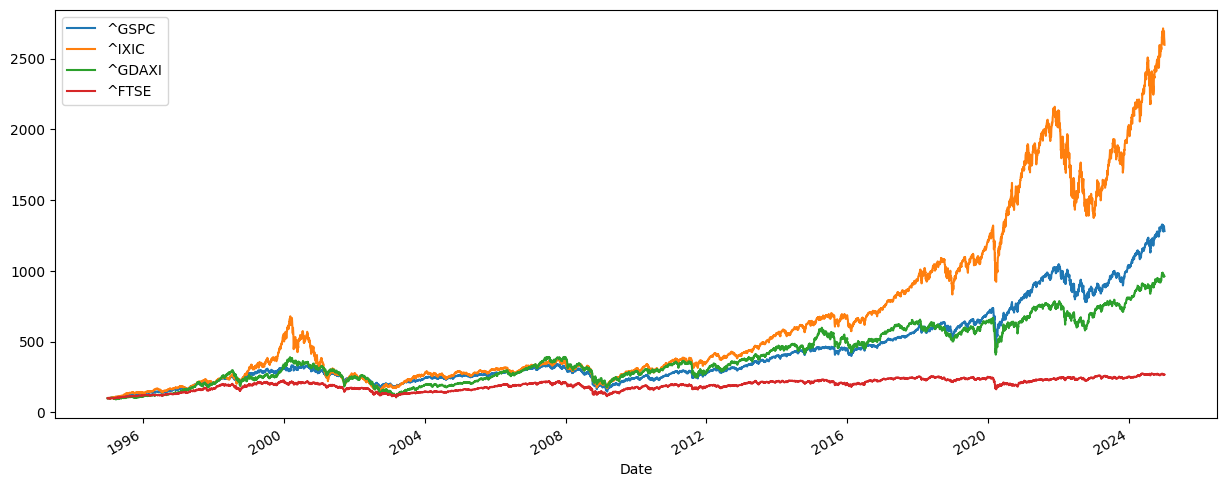

In [4]:
(ind_data / ind_data.iloc[0] *100).plot(figsize= (15,6))
plt.show()

Agora vamos calcular o retorno simples dos indices

In [5]:
ind_returns = (ind_data/ ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2024-12-24,0.011043,0.013471,NaN,0.004233
2024-12-26,-0.000406,-0.000538,NaN,NaN
2024-12-27,-0.011056,-0.014901,NaN,NaN
2024-12-30,-0.010702,-0.011928,-0.003762,-0.003534
2024-12-31,-0.004285,-0.009032,NaN,0.006403


Agora calcular os retornos anuais.

In [6]:
annaal_ind_return = ind_returns.mean() * 250
annaal_ind_return

^GSPC     0.102116
^IXIC     0.137213
^GDAXI    0.089181
^FTSE     0.045665
dtype: float64

#### O resultado dos retornos anuais reflete a análise do grafico temporal, onde todos os indices foram positivos, mesmo com algumas quedas de 1955 até 2024.
#### Agora vamos comparar o preço de fechamento de algumas empresas, com o indice S&500 e indice Dow Jones.
#### Para tal, precisamos baixar outra base de dados, com o preço de fechamente da 'PG', '^GSPC','^DJI'


In [7]:
import pandas as pd
import yfinance as yf  # Para baixar os dados financeiros
import numpy as np
import matplotlib.pyplot as plt

tickers = ['PG', '^GSPC','^DJI']
data_2 = pd.DataFrame()

for t in tickers:
    data_2[t]= yf.download(t, start='1995-01-01')['Close']

print(data_2.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  PG       ^GSPC         ^DJI
Date                                         
1995-01-03  7.441167  459.109985  3838.479980
1995-01-04  7.381518  460.709991  3857.649902
1995-01-05  7.277129  460.339996  3850.919922
1995-01-06  7.292045  460.679993  3867.409912
1995-01-09  7.262223  460.829987  3861.350098


In [8]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2024-12-26,170.160004,6037.589844,43325.800781
2024-12-27,169.529999,5970.839844,42992.210938
2024-12-30,167.089996,5906.939941,42573.730469
2024-12-31,167.649994,5881.629883,42544.218750
2025-01-02,165.979996,NaN,42392.269531


Vamos normalizar os dados. 


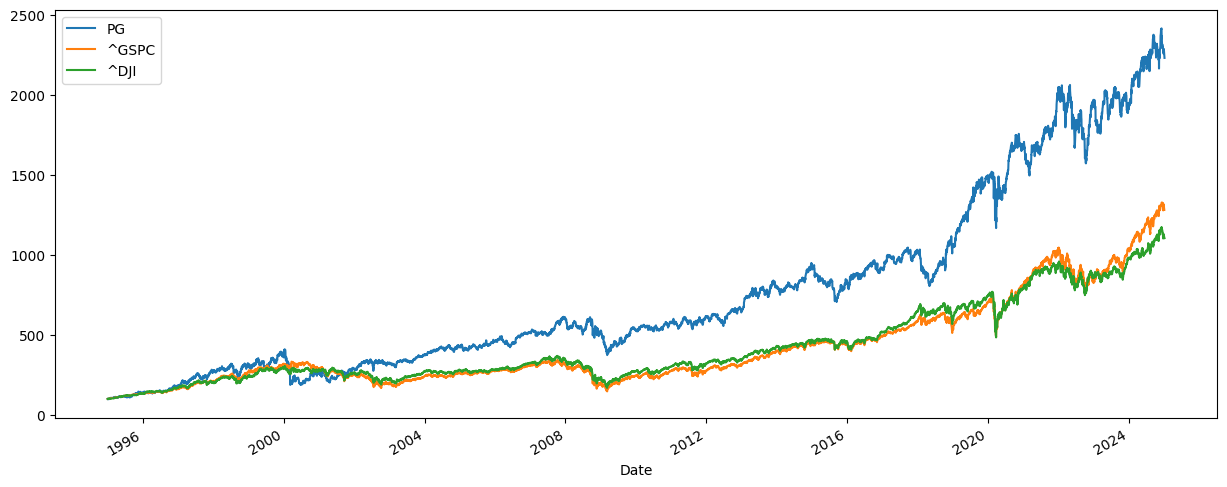

In [9]:
(data_2/data_2.iloc[0]*100).plot(figsize=(15,6))
plt.show()

O que fizemos acima, e uma comparação da ação com o indice de mercados de ações.